In [137]:
## This notebook will document the processing procedures for the Johnston Lab retinal organoid data



In [7]:
# Imports:

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# The samples we have received so far:

samples = [
"H7_D450_R1_S1_R1_001.fastq",
"H7_D450_R2_S2_R1_001.fastq",
"H7_iCas9_D414_R1_S3_R1_001.fastq",
"H7_iCas9_D414_R2_S4_R1_001.fastq",
"H7-iCas9-DBD-R1_S1_R1_001.fastq",
"H7-iCas9-DBD-R2_S2_R1_001.fastq",
"H7-iCas9-DBD-R3_S3_R1_001.fastq",
"H7-iCas9-DBD-T3-R1_S4_R1_001.fastq",
"H7-iCas9-DBD-T3-R2_S5_R1_001.fastq",
"H7-iCas9-DBD-T3-R3_S6_R1_001.fastq",
"H7-iCas9-T3-R1_S2_R1_001.fastq",
"H7-iCas9-T3-R2_S3_R1_001.fastq",
"H7-iCas9-WT-R1_S1_R1_001.fastq",
"KEld-111_1_S7_R1_001.fastq",
"KEld-111_2_S8_R1_001.fastq",
"KEld-111_3_S9_R1_001.fastq",
"KEld-128_1_S10_R1_001.fastq",
"KEld-128_2_S11_R1_001.fastq",
"KEld-128_3_S12_R1_001.fastq",
"KEld-158_1_S1_R1_001.fastq",
"KEld-158_2_S2_R1_001.fastq",
"KEld-173_1_S3_R1_001.fastq",
"KEld-173_2_S4_R1_001.fastq",
"KEld-173_3_S5_R1_001.fastq",
"KEld-181_1_S6_R1_001.fastq",
"KEld-181_2_S7_R1_001.fastq",
"KEld-181_3_S8_R1_001.fastq",
"KEld-35_1_S1_R1_001.fastq",
"KEld-35_2_S2_R1_001.fastq",
"KEld-35_3_S3_R1_001.fastq",
"KEld-380_1_S9_R1_001.fastq",
"KEld-380_2_S10_R1_001.fastq",
"KEld-380_3_S11_R1_001.fastq",
"KEld-69_1_S4_R1_001.fastq",
"KEld-69_2_S5_R1_001.fastq",
"KEld-69_3_S6_R1_001.fastq",
"Keld-D10_1_S1_R1_001.fastq",
"Keld-D10_2_S2_R1_001.fastq",
"Keld-D10_3_S3_R1_001.fastq",
"KEld-D200_1_S1_R1_001.fastq",
"KEld-D200_2_S2_R1_001.fastq",
"KEld-D200_3_S3_R1_001.fastq",
"Keld-D20_1_S4_R1_001.fastq",
"Keld-D20_2_S5_R1_001.fastq",
"Keld-D250_1_S6_R1_001.fastq",
"Keld-D250_2_S7_R1_001.fastq",
"Keld-D250_3_S8_R1_001.fastq",
"KEld-D303_1_S4_R1_001.fastq",
"KEld-D303_2_S5_R1_001.fastq",
"KEld-D303_3_S6_R1_001.fastq",
"KEld-R1_S1_R1_001.fastq",
"KEld-R2_S2_R1_001.fastq",
"KEld-R3_S3_R1_001.fastq",
"SHad-D329_R1_S1_R1_001.fastq",
"SHad-D329_R2_S2_R1_001.fastq",
"SHad-H7RA_On_R1_S1_R1_001.fastq",
"SHad-H7RA_On_R2_S2_R1_001.fastq",
"SHad-H7RA_On_R3_S3_R1_001.fastq",
"THRB_KO_D414_R1_S5_R1_001.fastq",
"THRB_KO_D414_R2_S6_R1_001.fastq",
"H7icas9_D200_RA20-200-R4_S4_R1_001.fastq",
"H7icas9_D200_RA20-200-R5_S5_R1_001.fastq",
"H7icas9_D200_RA20-200-R6_S6_R1_001.fastq",
"H7icas9_D200_RA20-130-R3_S1_R1_001.fastq",
"H7icas9_D200_RA20-130-R4_S2_R1_001.fastq",
"H7icas9_D200_RA20-130-R5_S3_R1_001.fastq",

          ]

sample_days = [
    450,
    450,
    414,
    414,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    111,
    111,
    111,
    128,
    128,
    128,
    158,
    158,
    173,
    173,
    173,
    181,
    181,
    181,
    35,
    35,
    35,
    380,
    380,
    380,
    69,
    69,
    69,
    10,
    10,
    10,
    200,
    200,
    200,
    20,
    20,
    250,
    250,
    250,
    303,
    303,
    303,
    0,
    0,
    0,
    329,
    329,
    0,
    0,
    0,
    414,
    414,
    200,
    200,
    200,
    200,
    200,
    200,
]

print(list(zip(samples,sample_days)))

# weri_samples = ["Keld-Control_1_S9_R1_001.fastq",
# "Keld-Control_2_S10_R1_001.fastq",
# "Keld-T3-Treated_1_S11_R1_001.fastq",
# "Keld-T3-Treated_2_S12_R1_001.fastq",
# "KEld-Weri_T3_S8_R1_001.fastq",
# "KEld-Weri_Untreated_S7_R1_001.fastq"]
# print(weri_samples)

# human_embryonic_samples = !ls ../../raw_data/human_embryonic/*.fastq
# print(human_embryonic_samples)

[('H7_D450_R1_S1_R1_001.fastq', 450), ('H7_D450_R2_S2_R1_001.fastq', 450), ('H7_iCas9_D414_R1_S3_R1_001.fastq', 414), ('H7_iCas9_D414_R2_S4_R1_001.fastq', 414), ('H7-iCas9-DBD-R1_S1_R1_001.fastq', 0), ('H7-iCas9-DBD-R2_S2_R1_001.fastq', 0), ('H7-iCas9-DBD-R3_S3_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R1_S4_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R2_S5_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R3_S6_R1_001.fastq', 0), ('H7-iCas9-T3-R1_S2_R1_001.fastq', 0), ('H7-iCas9-T3-R2_S3_R1_001.fastq', 0), ('H7-iCas9-WT-R1_S1_R1_001.fastq', 0), ('KEld-111_1_S7_R1_001.fastq', 111), ('KEld-111_2_S8_R1_001.fastq', 111), ('KEld-111_3_S9_R1_001.fastq', 111), ('KEld-128_1_S10_R1_001.fastq', 128), ('KEld-128_2_S11_R1_001.fastq', 128), ('KEld-128_3_S12_R1_001.fastq', 128), ('KEld-158_1_S1_R1_001.fastq', 158), ('KEld-158_2_S2_R1_001.fastq', 158), ('KEld-173_1_S3_R1_001.fastq', 173), ('KEld-173_2_S4_R1_001.fastq', 173), ('KEld-173_3_S5_R1_001.fastq', 173), ('KEld-181_1_S6_R1_001.fastq', 181), ('KEld-181_2_S7_R1_001.fas

In [ ]:
# This is the specification for processing the samples via bowtie

# First we will establish and document the commands for the construction of the indices

# For bowtie alignment we can choose between several different indices
# Hg38 is an alignment to fasta sequences of various chromosomes and certain other locations
# Gencode v27 transcriptome is an alignment to fasta sequences of the human transcriptome 
# Mini-index is an alignment exclusively to the fasta sequence of the OPN1LW/MW transcript

# The following must be downloaded in order to construct indices:
# gencode.v27.transcriptome.fa - available from gencode
# Hg38 Bowtie pre-made index, available from bowtie2 home page, specific version:
# GCA_000001405.15_GRCh38_no_alt_analysis_set.fna.bowtie_index

# The mini-index is constructed by exracting the fasta sequences for the following entries from the gencode transcriptome:
# >ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|
# >ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|

# This allows the construction mini_transcriptome.fa, which is also backed up on github due to its small size

# After constructing mini_transcriptome.fa, we run:
# !bowtie2-build --threads 5 mini_transcriptome.fa mini_bowtie_index

# Alternatively:
# !bowtie2-build --threads 24 gencode.v27.transcripts.fa gencode_bowtie_index



In [7]:
# Once the indices above are constructed, one can select a specific index and perform alignment
# This is the bowtie alignment specification
%cd ~/op_johnston/johnston_retina/notebook/
data_location = "~/op_johnston/raw_data/raw_data/"
output_location = "~/op_johnston/quantification/basic"

for sample in samples:
#     !echo {sample}
    
#     !unpigz -c {data_location}/compressed/{sample}.gz > {data_location}/{sample}
    
#     !bowtie2 -x ../gencode_transcriptome/mini_bowtie_index -p 5 -U {data_location}/{sample} > {output_location}/{sample}.sam

#     !rm {data_location}/{sample}
    
#     !ls
    
    # Once the alignment step is complete, samtools must be used to process the data:
    
#     !samtools view -bS {output_location}/{sample}.sam > {output_location}/{sample}.bam
#     !samtools sort {output_location}/{sample}.bam -o {output_location}/{sample}.sorted.bam

    # Finally we perform the pileup
    
    !samtools mpileup -l ../unique_lw_transcript.txt -f ../gencode_transcriptome/gencode.v27.transcripts.fa {output_location}/{sample}.sorted.bam > {output_location}/{sample}.pile
    !samtools mpileup -l ../unique_mw_transcript.txt -f ../gencode_transcriptome/gencode.v27.transcripts.fa {output_location}/{sample}.sorted.bam >> {output_location}/{sample}.pile


/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [11]:
# Additional quantification can be performed through the use of the kallisto package:
# Nicolas L Bray, Harold Pimentel, Páll Melsted and Lior Pachter, Near-optimal probabilistic RNA-seq quantification, Nature Biotechnology 34, 525–527 (2016), doi:10.1038/nbt.3519

# First we can construct the kallisto index. Construction of the index of the minitranscriptome is as follows:
!kallisto index -i ../gencode_kallisto_index/31mer_mini_index.kallisto ../gencode_transcriptome/mini_transcriptome.fa


[build] loading fasta file ../gencode_transcriptome/mini_transcriptome.fa
[build] k-mer length: 31
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 24 contigs and contains 1560 k-mers 



In [14]:
%cd ~/op_johnston/johnston_retina/notebook/
data_location = "~/op_johnston/raw_data/raw_data/"
output_location = "~/op_johnston/quantification/basic/kallisto_mini/"

for sample in samples:
    !echo {sample}
    !unpigz -c {data_location}/compressed/{sample}.gz > {data_location}/{sample}
    !mkdir {output_location}/{sample}_kallisto
    !kallisto quant -t 40 -b 100 --plaintext --single -l 75 -s 10 -i ../gencode_kallisto_index/31mer_mini_index.kallisto -o {output_location}/{sample}_kallisto {data_location}/{sample}
    !rm {data_location}/{sample}

/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
H7_D450_R1_S1_R1_001.fastq
mkdir: cannot create directory ‘/home/bbrener1/op_johnston/quantification/basic/kallisto//H7_D450_R1_S1_R1_001.fastq_kallisto’: File exists

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//H7_D450_R1_S1_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 72,304,824 reads, 1,279 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


H7_D450_R2_S2_R1_001.fastq
mkdir: cannot create directory ‘/home/bbrener1/op_johnston/quantification/basic/kallisto//H7_D450_R2_S2_R1_001.fastq_kallisto’: File exists

[quant] fragment length 

[quant] finding pseudoalignments for the reads ... done
[quant] processed 183,431,598 reads, 5,256 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


H7-iCas9-WT-R1_S1_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//H7-iCas9-WT-R1_S1_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 173,118,186 reads, 8,217 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


KEld-111_1_S7_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of tar

[quant] finding pseudoalignments for the reads ... done
[quant] processed 43,121,847 reads, 444 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


KEld-181_2_S7_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//KEld-181_2_S7_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 39,664,124 reads, 3,049 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


KEld-181_3_S8_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[ind

Aborted (core dumped)
Keld-D10_2_S2_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//Keld-D10_2_S2_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 30,169,864 reads, 0 reads pseudoaligned
[~warn] no reads pseudoaligned.
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds
terminate called after throwing an instance of 'std::domain_error'
terminate called recursively
  what():  nsamp must be -1 or >=1
terminate called recursively
terminate called recursively
Aborted (core dumped)
Keld-D10_3_S3_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[

[quant] finding pseudoalignments for the reads ... done
[quant] processed 1,901,012 reads, 3 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


KEld-R1_S1_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//KEld-R1_S1_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 191,125,173 reads, 995 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


KEld-R2_S2_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of

[quant] finding pseudoalignments for the reads ... done
[quant] processed 102,646,594 reads, 1,115 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds


H7icas9_D200_RA20-130-R3_S1_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 2
[index] number of k-mers: 1,560
[index] number of equivalence classes: 3
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//H7icas9_D200_RA20-130-R3_S1_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 84,957,785 reads, 0 reads pseudoaligned
[~warn] no reads pseudoaligned.
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 52 rounds
terminate called after throwing an instance of 'std::domain_error'
terminate called recursively
terminate called

In [ ]:
%cd ~/op_johnston/johnston_retina/notebook/
data_location = "~/op_johnston/raw_data/raw_data/"
output_location = "~/op_johnston/quantification/basic/kallisto/"

for sample in samples:
    !echo {sample}
    !unpigz -c {data_location}/compressed/{sample}.gz > {data_location}/{sample}
    !mkdir {output_location}/{sample}_kallisto
    !kallisto quant -t 40 -b 100 --plaintext --single -l 75 -s 10 -i ../gencode_kallisto_index/31mer_index.kallisto -o {output_location}/{sample}_kallisto {data_location}/{sample}
    !rm {data_location}/{sample}

/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
H7_D450_R1_S1_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 200,401
[index] number of k-mers: 126,160,363
[index] number of equivalence classes: 825,248
[quant] running in single-end mode
[quant] will process file 1: /home/bbrener1/op_johnston/raw_data/raw_data//H7_D450_R1_S1_R1_001.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 72,304,824 reads, 62,291,900 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 1,243 rounds


H7_D450_R2_S2_R1_001.fastq

[quant] fragment length distribution is truncated gaussian with mean = 75, sd = 10
[index] k-mer length: 31
[index] number of targets: 200,401
[index] number of k-mers: 126,160,363
[index] number of equivalence classes: 825,248
[quant] running in single-end mode
[quant] will pr

In [ ]:
# Pileups are the primary output of the current pipeline.

# We will now address processing them. 

In [71]:
# Processing .pile files and plotting output:

def load_pile(location):
    raw_table = np.loadtxt(location,dtype=str)
    
    # If the pileup contains only one line loadtxt will interpret it as a 1 dim array,
    # we correct here
    if len(raw_table.shape) < 2:
        raw_table = np.array([raw_table,])

    # We need to check that the pileup isn't empty, which happens if there are no alignments
    # to the locations in question
    if raw_table.shape[0] > 1:
        pile = {
            'location_names' : raw_table[:,0],
            'positions' : raw_table[:,1].astype(dtype=int),
            'base_in_reference' : raw_table[:,2],
            'pileup' : raw_table[:,3].astype(dtype=int),
        }
        return pile
    # Else we return a pileup that is empty
    else:
        pile = {
            'location_names' : np.zeros((0,0)).astype(dtype=str),
            'positions' : np.zeros((0,0)).astype(dtype=int),
            'base_in_reference' : np.zeros((0,0)).astype(dtype=str),
            'pileup' : np.zeros((0,0)).astype(dtype=int),
        }
        return pile
    

sample_piles = [load_pile('../../quantification/basic_4/' + s + '.pile') for s in samples]
sample_piles

/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R1_S1_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R2_S2_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R3_S3_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-T3-R1_S4_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarnin

[{'location_names': array(['ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000

In [78]:
# First we need a set of uniquely named locations and positions that we are examining:

unique_locations = set()
for pile in sample_piles:
    for l,p in zip(pile['location_names'],pile['positions']):
        unique_locations.add((l,p))

# Next we sort the set and produce a set of indices for each position for plotting purposes:
unique_locations = list(unique_locations)
unique_locations = sorted(unique_locations)
unique_locations = {ul:i for i,ul in enumerate(unique_locations)}

print(unique_locations)
        
sample_order = np.argsort(sample_days)
plot_table = np.zeros((len(samples),len(unique_locations)))

# Now we go through each sample sorted by the days that sample was collected on,
# find the pileup corresponding to that sample, and for each combination of 
# location name and position, we look up the index in the dictionary constructed earlier,
# then insert it into the table
for i,sample_index in enumerate(sample_order):
    sample_pile = sample_piles[sample_index]
    for l,p,n in zip(sample_pile['location_names'],sample_pile['positions'],sample_pile['pileup']):
        ul_index = unique_locations[(l,p)]
        plot_table[i,ul_index] = n
        


{('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 254): 0, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 360): 1, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 391): 2, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 407): 3, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 749): 4, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 757): 5, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 758): 6, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-20

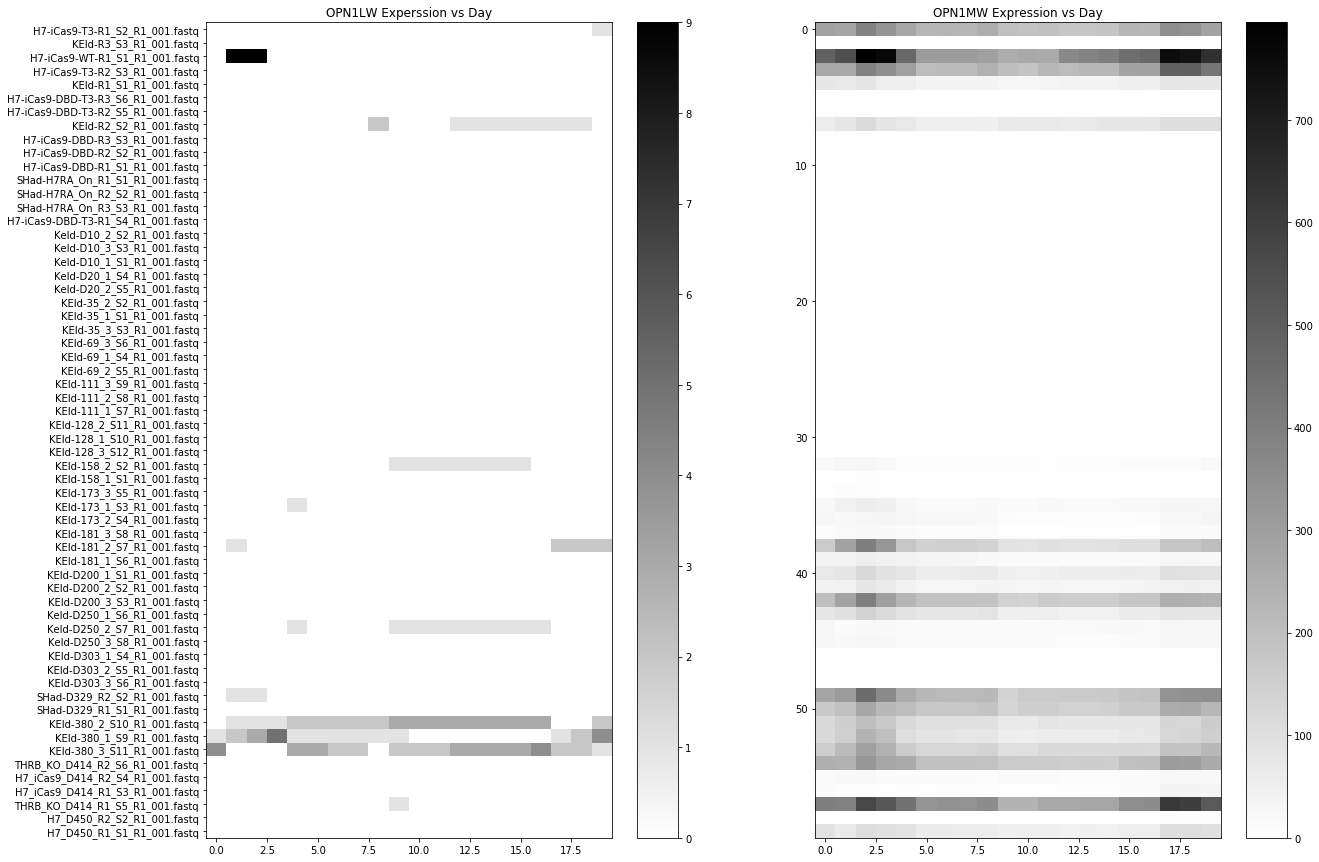

In [95]:
fig = plt.figure(figsize=(20,15))

plt.subplot(121)
plt.title("OPN1LW Experssion vs Day")
plt.imshow(plot_table[:,:20],aspect='auto',cmap='binary')
plt.colorbar()
plt.yticks(np.arange(len(samples)),labels=np.array(samples)[sample_order])
plt.subplot(122)
plt.title("OPN1MW Expression vs Day")
plt.imshow(plot_table[:,20:],aspect='auto',cmap='binary')
plt.colorbar()
plt.show()

In [119]:
# We would like to sanity-check our pileups via a direct grep of the underlying FASTQ files:

# Here are sequences we'd like to grep for, note we are grepping for reverse complement of ref:

# Exon 5 beginning (non-unique):
# Reference sequence: GTGGCAAAGCAGCAG
ex5e = 'CTGCTGCTTTGCCAC'

# Exon 5, first 3 unique sites:
# LW reference: ATCTTTGCGTACTGC
# MW reference: GTCCTGGCATTCTGC
ex5ulw = 'GCAGTACGCAAAGAT'
ex5umw = 'GCAGAATGCCAGGAC'

!cat ../../raw_data/raw_data/KEld-181_3_S8_R1_001.fastq | grep -F {ex5umw}
grep_table = np.zeros((len(sample_order[30:-6]),3))

for i,sample_index in enumerate(sample_order[30:-6]):
    sample = samples[sample_index]
    print(sample)
    
    early = !cat ../../raw_data/raw_data/{sample} | grep -F {ex5e} | wc -l
    lw_count = !cat ../../raw_data/raw_data/{sample} | grep -F {ex5ulw} | wc -l
    mw_count = !cat ../../raw_data/raw_data/{sample} | grep -F {ex5umw} | wc -l
    try:
        grep_table[i,0] = int(early[0])
        grep_table[i,1] = int(lw_count[0])
        grep_table[i,2] = int(mw_count[0])
    except:
        print([early,lw_count,mw_count])
        continue
    print(grep_table[i])


CTCCCAGATGCCCGTGGATATCCTGGGACAAGTCACGCAGCAGAATGCCAGGACTCTTATCCGCAACATGCAGGCT
GCCAGGGTTGGCAGCAGCAAAGCATGCGAAGAAGGCGTAGGGTCCCCAGCAGAAGCAGAATGCCAGGACCATCCCC
AGCCAGGGTTGGCAGCAGCAAAGCATGCGAAGAAGGCGTAGGGTCCCCAGCAGAAGCAGAATGCCAGGACCATCAC
KEld-128_1_S10_R1_001.fastq
[4. 0. 0.]
KEld-128_3_S12_R1_001.fastq
[6. 0. 0.]
KEld-158_2_S2_R1_001.fastq
[19.  1.  6.]
KEld-158_1_S1_R1_001.fastq
[9. 0. 3.]
KEld-173_3_S5_R1_001.fastq
[8. 0. 0.]
KEld-173_1_S3_R1_001.fastq
[35.  0. 11.]
KEld-173_2_S4_R1_001.fastq
[23.  0.  8.]
KEld-181_3_S8_R1_001.fastq
[16.  1.  3.]
KEld-181_2_S7_R1_001.fastq
[178.   0.  64.]
KEld-181_1_S6_R1_001.fastq
[30.  0. 11.]
KEld-D200_1_S1_R1_001.fastq
[74.  0. 42.]
KEld-D200_2_S2_R1_001.fastq
[57.  0. 23.]
KEld-D200_3_S3_R1_001.fastq
[231.   0.  98.]
Keld-D250_1_S6_R1_001.fastq
[103.   0.  30.]
Keld-D250_2_S7_R1_001.fastq
[24.  1. 13.]
Keld-D250_3_S8_R1_001.fastq
[13.  0.  9.]
KEld-D303_1_S4_R1_001.fastq
[17.  0.  3.]
KEld-D303_2_S5_R1_001.fastq
[7. 0. 1.]
KEld-D303_3_S6_R1_001.fastq

In [120]:
grep_table

array([[  4.,   0.,   0.],
       [  6.,   0.,   0.],
       [ 19.,   1.,   6.],
       [  9.,   0.,   3.],
       [  8.,   0.,   0.],
       [ 35.,   0.,  11.],
       [ 23.,   0.,   8.],
       [ 16.,   1.,   3.],
       [178.,   0.,  64.],
       [ 30.,   0.,  11.],
       [ 74.,   0.,  42.],
       [ 57.,   0.,  23.],
       [231.,   0.,  98.],
       [103.,   0.,  30.],
       [ 24.,   1.,  13.],
       [ 13.,   0.,   9.],
       [ 17.,   0.,   3.],
       [  7.,   0.,   1.],
       [  1.,   0.,   0.],
       [286.,   0.,  88.],
       [183.,   0.,  91.],
       [112.,   3.,  52.],
       [121.,   0.,  37.],
       [193.,   2.,  64.]])

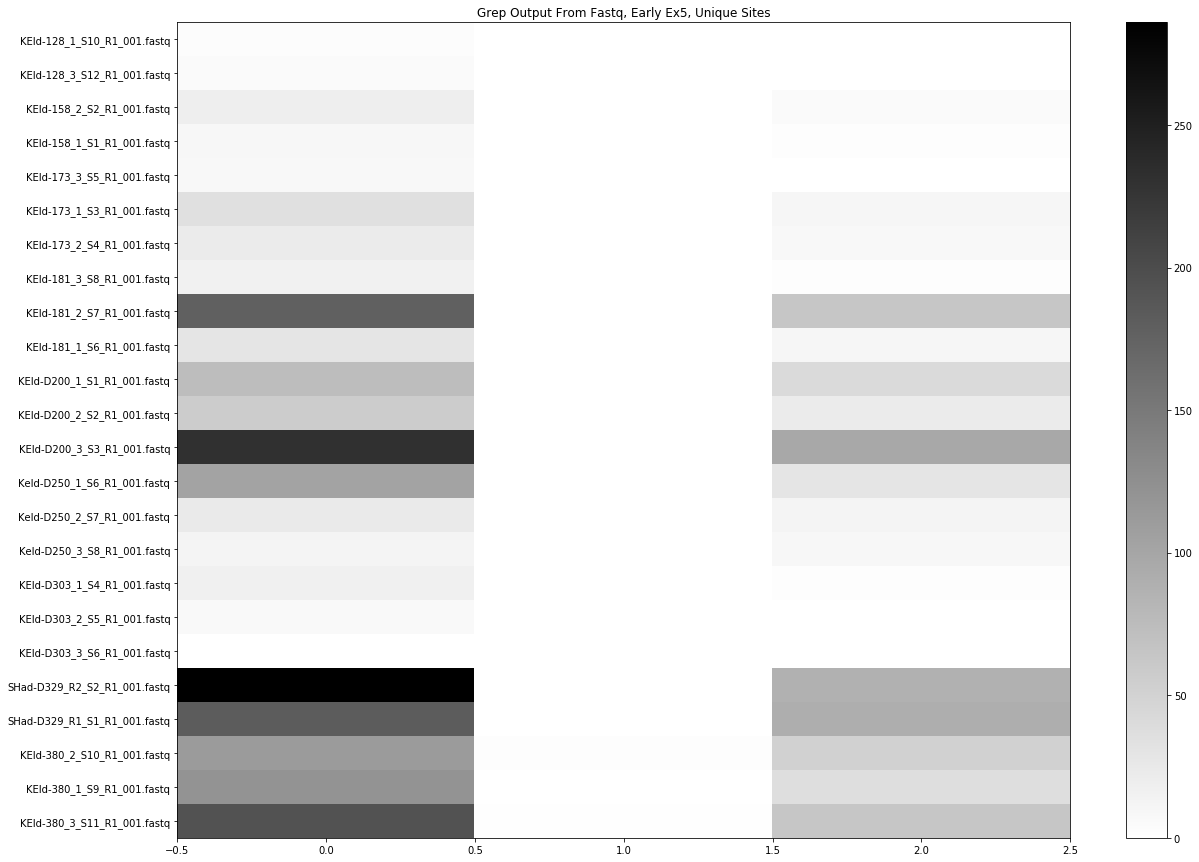

In [123]:
fig = plt.figure(figsize=(20,15))

plt.title("Grep Output From Fastq, Early Ex5, Unique Sites")
plt.imshow(grep_table,aspect='auto',cmap='binary')
plt.colorbar()
plt.yticks(np.arange(24),labels=np.array(samples)[sample_order][30:-6])
plt.show()

In [135]:
# Let's examine Weri and Human data to see if the problems extend there as well

weri_piles = [load_pile('../../quantification/weri/' + s + '.pile') for s in weri_samples]
weri_table = np.zeros((6,40))

for i,weri in enumerate(weri_samples):
    weri_pile = weri_piles[i]
    for l,p,n in zip(weri_pile['location_names'],weri_pile['positions'],weri_pile['pileup']):
        ul_index = unique_locations[(l,p)]
        print(i,ul_index)
        weri_table[i,ul_index] = n


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


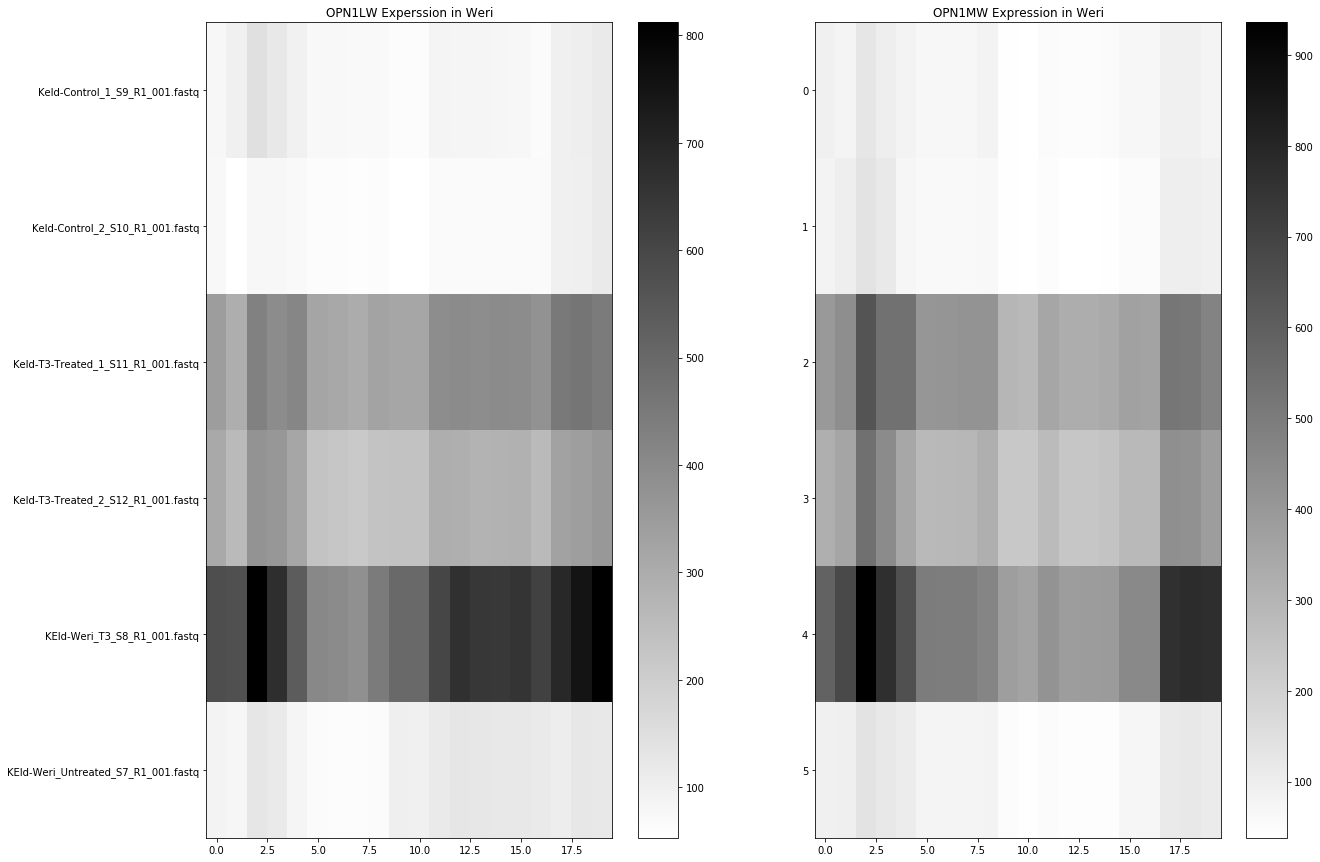

In [136]:
fig = plt.figure(figsize=(20,15))

plt.subplot(121)
plt.title("OPN1LW Experssion in Weri")
plt.imshow(weri_table[:,:20],aspect='auto',cmap='binary')
plt.colorbar()
plt.yticks(np.arange(len(weri_samples)),labels=np.array(weri_samples))
plt.subplot(122)
plt.title("OPN1MW Expression in Weri")
plt.imshow(weri_table[:,20:],aspect='auto',cmap='binary')
plt.colorbar()
plt.show()

In [1]:
# Now we would like to build up a pipeline for using extant human retinal data as controls

# The following paper will be used as source material for the data:
# Pinelli, Michele, Annamaria Carissimo, Luisa Cutillo, Ching-Hung Lai, Margherita Mutarelli, 
# Maria Nicoletta Moretti, Marwah Veer Singh et al. "An atlas of gene expression and gene co-regulation 
#  in the human retina." Nucleic acids research 44, no. 12 (2016): 5773-5784.

# doi: 10.1093/nar/gkw486

# Data was pulled down https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-4377/files/processed/?ref=E-MTAB-4377

# The Johnston Lab expressed no preference to specific files to process, so the first 3 were processed:


In [16]:
%cd ~/op_johnston/raw_data/human_retina/
!wget https://www.ebi.ac.uk/arrayexpress/files/E-MTAB-4377/E-MTAB-4377.RNA1.bam
!wget https://www.ebi.ac.uk/arrayexpress/files/E-MTAB-4377/E-MTAB-4377.RNA10.bam
!wget https://www.ebi.ac.uk/arrayexpress/files/E-MTAB-4377/E-MTAB-4377.RNA11.bam

/localscratch/bbrener1/johnston_retina/raw_data/human_retina
--2020-01-03 11:32:26--  https://www.ebi.ac.uk/arrayexpress/files/E-MTAB-4377/E-MTAB-4377.RNA1.bam
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3668843643 (3.4G) [application/octet-stream]
Saving to: ‘E-MTAB-4377.RNA1.bam’

E-MTAB-4377.RNA1.ba 100%[===================>]   3.42G  10.7MB/s    in 41m 30s 

2020-01-03 12:13:58 (1.41 MB/s) - ‘E-MTAB-4377.RNA1.bam’ saved [3668843643/3668843643]

--2020-01-03 12:13:58--  https://www.ebi.ac.uk/arrayexpress/files/E-MTAB-4377/E-MTAB-4377.RNA10.bam
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4386839828 (4.1G) [application/octet-stream]
Saving to: ‘E-MTAB-4377.RNA10.bam’

E-MTAB-4377.RNA10.b 100%[=======

In [2]:
## These are (presumably) sorted bam files already. We would like to extract the fastq back out, since we are unsure wheat these are aligned to.

In [2]:
%cd ~/op_johnston/raw_data/human_retina/
# !bedtools bamtofastq -i E-MTAB-4377.RNA1.bam -fq E-MTAB-4377.RNA1.fastq
# !bedtools bamtofastq -i E-MTAB-4377.RNA10.bam -fq E-MTAB-4377.RNA10.fastq
# !bedtools bamtofastq -i E-MTAB-4377.RNA11.bam -fq E-MTAB-4377.RNA11.fastq

/localscratch/bbrener1/johnston_retina/raw_data/human_retina


In [7]:
%cd ~/op_johnston/raw_data/human_retina/
!ls -lh *.fastq

/localscratch/bbrener1/johnston_retina/raw_data/human_retina
-rw-r--r-- 1 bbrener1 bx-bio-marcc-login 15G Jan  6 12:40 E-MTAB-4377.RNA10.fastq
-rw-r--r-- 1 bbrener1 bx-bio-marcc-login 14G Jan  6 13:19 E-MTAB-4377.RNA11.fastq
-rw-r--r-- 1 bbrener1 bx-bio-marcc-login 12G Jan  3 14:01 E-MTAB-4377.RNA1.fastq


In [9]:
# Now we set up a directory to deposit quantified data in:
%cd ~/op_johnston/quantification/
!mkdir human_retina

/localscratch/bbrener1/johnston_retina/quantification


In [1]:
# Now we can align and pile up the samples

# The script assumes we are running from the notebook directory:
%cd ~/op_johnston/johnston_retina/notebook/

data_location = "/localscratch/bbrener1/johnston_retina/raw_data/human_retina/"
# samples = ["E-MTAB-4377.RNA1.fastq","E-MTAB-4377.RNA10.fastq","E-MTAB-4377.RNA11.fastq"]
output_location = "/localscratch/bbrener1/johnston_retina/quantification/human_retina/"

for sample in samples:
    !echo {sample}
    !bowtie2 -x ../gencode_transcriptome/mini_bowtie_index -p 5 -U {data_location}/{sample} > {output_location}/{sample}.sam

    # Once the alignment step is complete, samtools must be used to process the data:
    
    !samtools view -bS {output_location}/{sample}.sam > {output_location}/{sample}.bam
    !samtools sort {output_location}/{sample}.bam -o {output_location}/{sample}.sorted.bam

    # Finally we perform the pileup
    
    !samtools mpileup -l ../unique_lw_transcript.txt -f ../gencode_transcriptome/gencode.v27.transcripts.fa {output_location}/{sample}.sorted.bam > {output_location}/{sample}.pile
    !samtools mpileup -l ../unique_mw_transcript.txt -f ../gencode_transcriptome/gencode.v27.transcripts.fa {output_location}/{sample}.sorted.bam >> {output_location}/{sample}.pile


/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
E-MTAB-4377.RNA10.fastq
79191657 reads; of these:
  79191657 (100.00%) were unpaired; of these:
    79141893 (99.94%) aligned 0 times
    1663 (0.00%) aligned exactly 1 time
    48101 (0.06%) aligned >1 times
0.06% overall alignment rate
[bam_sort_core] merging from 22 files and 1 in-memory blocks...
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
76830931 reads; of these:
  76830931 (100.00%) were unpaired; of these:
    76798757 (99.96%) aligned 0 times
    993 (0.00%) aligned exactly 1 time
    31181 (0.04%) aligned >1 times
0.04% overall alignment rate
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [6]:
%cd ~/op_johnston/quantification/human_retina/
!ls

/localscratch/bbrener1/johnston_retina/quantification/human_retina
E-MTAB-4377.RNA10.fastq.bam	    E-MTAB-4377.RNA11.fastq.sam
E-MTAB-4377.RNA10.fastq.pile	    E-MTAB-4377.RNA11.fastq.sorted.bam
E-MTAB-4377.RNA10.fastq.sam	    E-MTAB-4377.RNA1.fastq.bam
E-MTAB-4377.RNA10.fastq.sorted.bam  E-MTAB-4377.RNA1.fastq.pile
E-MTAB-4377.RNA11.fastq.bam	    E-MTAB-4377.RNA1.fastq.sam
E-MTAB-4377.RNA11.fastq.pile	    E-MTAB-4377.RNA1.fastq.sorted.bam


In [17]:
%cd ../../quantification/basic/kallisto/

/localscratch/bbrener1/johnston_retina/quantification/basic/kallisto


In [ ]:
for sample in samples:
    !cp {sample}_kallisto/abundance.tsv {sample}_kallisto/{sample}_abundance.tsv

In [28]:
## Finally we'd like to process the macaque files also

macaque_samples = [
    "SHad-110d_S2_R1_001.fastq",
    "SHad-156_S3_R1_001.fastq",
    "SHad-166_S4_R1_001.fastq",
    "SHad-90d_S1_R1_001.fastq",
]

In [26]:
# We build a new index (v2)

# %cd ~/op_johnston/johnston_retina/notebook/
# !bowtie2-build --threads 5 ../gencode_transcriptome/macaque_transcript_v2.fa mini_index_v2


/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
Settings:
  Output files: "mini_index_v2.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 20
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ../gencode_transcriptome/macaque_transcript_v2.fa
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 111
Using parameters --bmax 84 --dcv 1024
  Doing ahead-of-time memory usage test
  Pas

Exiting Ebwt::buildToDisk()
Returning from initFromVector
Wrote 4195267 bytes to primary EBWT file: mini_index_v2.1.bt2
Wrote 564 bytes to secondary EBWT file: mini_index_v2.2.bt2
Re-opening _in1 and _in2 as input streams
Returning from Ebwt constructor
Headers:
    len: 2232
    bwtLen: 2233
    sz: 558
    bwtSz: 559
    lineRate: 6
    offRate: 4
    offMask: 0xfffffff0
    ftabChars: 10
    eftabLen: 20
    eftabSz: 80
    ftabLen: 1048577
    ftabSz: 4194308
    offsLen: 140
    offsSz: 560
    lineSz: 64
    sideSz: 64
    sideBwtSz: 48
    sideBwtLen: 192
    numSides: 12
    numLines: 12
    ebwtTotLen: 768
    ebwtTotSz: 768
    color: 0
    reverse: 0
Total time for call to driver() for forward index: 00:00:00
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to reverse reference sequence: 00:00:00
bmax accor

Exiting Ebwt::buildToDisk()
Returning from initFromVector
Wrote 4195267 bytes to primary EBWT file: mini_index_v2.rev.1.bt2
Wrote 564 bytes to secondary EBWT file: mini_index_v2.rev.2.bt2
Re-opening _in1 and _in2 as input streams
Returning from Ebwt constructor
Headers:
    len: 2232
    bwtLen: 2233
    sz: 558
    bwtSz: 559
    lineRate: 6
    offRate: 4
    offMask: 0xfffffff0
    ftabChars: 10
    eftabLen: 20
    eftabSz: 80
    ftabLen: 1048577
    ftabSz: 4194308
    offsLen: 140
    offsSz: 560
    lineSz: 64
    sideSz: 64
    sideBwtSz: 48
    sideBwtLen: 192
    numSides: 12
    numLines: 12
    ebwtTotLen: 768
    ebwtTotSz: 768
    color: 0
    reverse: 1
Total time for backward call to driver() for mirror index: 00:00:00


In [29]:
%cd ~/op_johnston/johnston_retina/notebook/
data_location = "~/op_johnston/raw_data/macaque/"
output_location = "~/op_johnston/quantification/macaque_v2"

for sample in macaque_samples:

    !echo {sample}
    
    !unpigz -c {data_location}/compressed/{sample}.gz > {data_location}/{sample}
    
    !bowtie2 -x ../gencode_transcriptome/mini_index_v2 -p 20 -U {data_location}/{sample} > {output_location}/{sample}.sam

    !rm {data_location}/{sample}
    
    !ls
    
#     Once the alignment step is complete, samtools must be used to process the data:
    
    !samtools view -bS {output_location}/{sample}.sam > {output_location}/{sample}.bam
    !samtools sort {output_location}/{sample}.bam -o {output_location}/{sample}.sorted.bam

#     Finally we perform the pileup
    
    !samtools mpileup -l ../macaque_unique_lw.txt -f ../gencode_transcriptome/macaque_transcript_v2.fa {output_location}/{sample}.sorted.bam > {output_location}/{sample}.pile
    !samtools mpileup -l ../macaque_unique_mw.txt -f ../gencode_transcriptome/macaque_transcript_v2.fa {output_location}/{sample}.sorted.bam >> {output_location}/{sample}.pile


/localscratch/bbrener1/johnston_retina/johnston_retina/notebook
SHad-110d_S2_R1_001.fastq
102291175 reads; of these:
  102291175 (100.00%) were unpaired; of these:
    102266907 (99.98%) aligned 0 times
    417 (0.00%) aligned exactly 1 time
    23851 (0.02%) aligned >1 times
0.02% overall alignment rate
nohup.out  processing.ipynb
[bam_sort_core] merging from 29 files and 1 in-memory blocks...
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
SHad-156_S3_R1_001.fastq
99812810 reads; of these:
  99812810 (100.00%) were unpaired; of these:
    99796455 (99.98%) aligned 0 times
    284 (0.00%) aligned exactly 1 time
    16071 (0.02%) aligned >1 times
0.02% overall alignment rate
nohup.out  processing.ipynb
[bam_sort_core] merging from 28 files and 1 in-memory blocks...
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
[mpileup] 1 samples in 1 input files
<